# Benchmark SAC with Original Implementation

Github Repo: git@github.com:XiaohanZhangCMU/sderl.git. 

Note: sderl/sac works only with continuous action environments



# Work node preparation

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
os.getcwd()
os.chdir('/content/gdrive/My Drive/ActiveProjects/sderl/')

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
# Stable Baselines only supports tensorflow 1.x for now
# %tensorflow_version 1.x
# !apt install swig cmake libopenmpi-dev zlib1g-dev
# !pip install stable-baselines[mpi]==2.10.0 box2d box2d-kengz

In [5]:
# !apt install swig cmake libopenmpi-dev zlib1g-dev
!pip install -e . 
# !pip install box2d box2d-kengz

Obtaining file:///content/gdrive/My%20Drive/ActiveProjects/sderl
     |████████████████████████████████| 1.4MB 4.7MB/s 
     |████████████████████████████████| 450kB 30.9MB/s 
  Created wheel for mpi4py: filename=mpi4py-3.0.3-cp36-cp36m-linux_x86_64.whl size=2074474 sha256=95b81c91457b888228d1d061d9c3b8c77e25e59020b9e0725851fbd1301ef048
  Stored in directory: /root/.cache/pip/wheels/18/e0/86/2b713dd512199096012ceca61429e12b960888de59818871d6
Successfully built mpi4py
  Running setup.py develop for sderl


#Run experiment from script (LunarLanderContinuous-v2)

In [25]:
%%time
from sderl import sac_pytorch as sac
import torch
import gym

env_fn = lambda : gym.make('LunarLanderContinuous-v2')

ac_kwargs = dict(hidden_sizes=[64,64], activation=torch.nn.ReLU)

logger_kwargs = dict(output_dir='./output_dir_tmp', exp_name='sac_lunarcontinuous-v2')

sac(env_fn=env_fn, ac_kwargs=ac_kwargs, steps_per_epoch=5000, epochs=250, logger_kwargs=logger_kwargs)

Logging data to ./output_dir_tmp/progress.txt
Saving config:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            64,
            64
        ]
    },
    "actor_critic":	"MLPActorCritic",
    "alpha":	0.2,
    "batch_size":	100,
    "device":	"cuda",
    "env_fn":	"<function <lambda> at 0x7f933001f158>",
    "epochs":	250,
    "exp_name":	"sac_lunarcontinuous-v2",
    "gamma":	0.99,
    "logger":	{
        "<sderl.utils.logx.EpochLogger object at 0x7f9317645a90>":	{
            "epoch_dict":	{},
            "exp_name":	"sac_lunarcontinuous-v2",
            "first_row":	true,
            "log_current_row":	{},
            "log_headers":	[],
            "output_dir":	"./output_dir_tmp",
            "output_file":	{
                "<_io.TextIOWrapper name='./output_dir_tmp/progress.txt' mode='w' encoding='UTF-8'>":	{
                    "mode":	"w"
                }
            }
        }
    },
    "logger_kwargs":	{
        "exp_name":	"sac_lunarco

# Experiment Grid for hyperparameters tuning. Work with MPI.

In [ ]:
#!hostname
#!echo -e "127.0.0.1 8ead254c6477" >> /etc/hosts
!echo -e "127.0.0.1 $(hostname)" >> /etc/hosts

In [ ]:
 %%time
 from sderl.utils.run_utils import ExperimentGrid
 from sderl import ppo_pytorch
 import torch

#  if __name__ == '__main__':
#      import argparse
#      parser = argparse.ArgumentParser()
#      parser.add_argument('--cpu', type=int, default=4)
#      parser.add_argument('--num_runs', type=int, default=3)
#      args = parser.parse_args()
cpu=1
num_runs = 3

eg = ExperimentGrid(name='ppo-pyt-bench')
eg.add('env_name', 'LunarLanderContinuous-v2', '', True)
eg.add('seed', [10*i for i in range(num_runs)])
eg.add('epochs', 10)
eg.add('steps_per_epoch', 5000)
eg.add('ac_kwargs:hidden_sizes', [(32,), (64,64)], 'hid')
eg.add('ac_kwargs:activation', [torch.nn.Tanh, torch.nn.ReLU], '')
# eg.run(ppo_pytorch, num_cpu=cpu)
eg.run(ppo_pytorch)

Launching in...:                                                       | ? 00:00

ExperimentGrid [ppo-pyt-bench] runs over parameters:

 env_name                                 [] 

	LunarLanderContinuous-v2

 seed                                     [see] 

	0
	10
	20

 epochs                                   [epo] 

	10

 steps_per_epoch                          [ste] 

	5000

 ac_kwargs:hidden_sizes                   [hid] 

	(32,)
	(64, 64)

 ac_kwargs:activation                     [] 

	Tanh
	ReLU

 Variants, counting seeds:               12
 Variants, not counting seeds:           4


Preparing to run the following experiments...

ppo-pyt-bench_lunarlandercontinuous-v2_hid32_relu
ppo-pyt-bench_lunarlandercontinuous-v2_hid32_tanh
ppo-pyt-bench_lunarlandercontinuous-v2_hid64-64_relu
ppo-pyt-bench_lunarlandercontinuous-v2_hid64-64_tanh


Launch delayed to give you a few seconds to review your experiments.

To customize or disable this behavior, change WAIT_BEFORE_LAUNCH in
sderl/user_config.py.



Running experiment:

ppo-pyt-bench_lunarlandercontinuous-v2_hid32_tanh

with kwargs:

{
    "ac_kwargs":	{
        "activation":	"Tanh",
        "hidden_sizes":	[
            32
        ]
    },
    "env_name":	"LunarLanderContinuous-v2",
    "epochs":	10,
    "seed":	0,
    "steps_per_epoch":	5000
}







End of experiment.


Plot results from this run with:

python -m sderl.run plot /content/gdrive/My Drive/ActiveProjects/sderl/data/ppo-pyt-bench_lunarlandercontinuous-v2_hid32_tanh/ppo-pyt-bench_lunarlandercontinuous-v2_hid32_tanh_s0


Watch the trained agent with:

python -m sderl.run test_policy /content/gdrive/My Drive/ActiveProjects/sderl/data/ppo-pyt-bench_lunarlandercontinuous-v2_hid32_tanh/ppo-pyt-bench_lunarlandercontinuous-v2_hid32_tanh_s0







Running experiment:

ppo-pyt-bench_lunarlandercontinuous-v2_hid32_relu

with kwargs:

{
    "ac_kwargs":	{
        "activation":	"ReLU",
        "hidden_sizes":	[
            32
        ]
    },
    "env_name":	"LunarLanderContinuo

# Check results

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Plotting from...

./output_dir



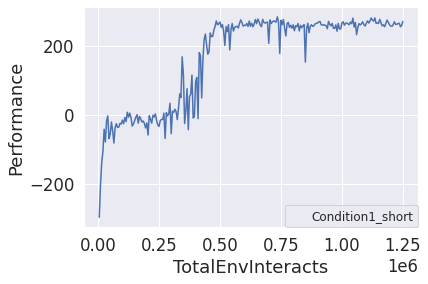

In [ ]:
from sderl.utils.plot import make_plots
from sderl.utils.plot import plot_data

data = make_plots(['./output_dir'], xaxis='TotalEnvInteracts',  values='Performance', smooth=1, estimator='mean', shorten_legends=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Plotting from...

./output_dir_tmp



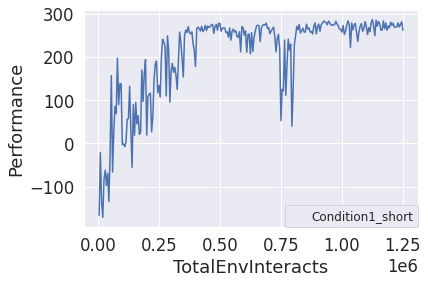

In [6]:
from sderl.utils.plot import make_plots
from sderl.utils.plot import plot_data

data = make_plots(['./output_dir_tmp'], xaxis='TotalEnvInteracts',  values='Performance', smooth=1, estimator='mean', shorten_legends=True)